In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/srv/data/shared_documents/Team-9/SPREE_SY2122_School_Metric_Scores_Student_Climate_Rating-2.csv', delimiter=';', on_bad_lines = 'warn')

In [4]:
df.head()

,ULCS Code,school_name,accountability_year,report_type,metric,numerator,denominator,metric_score,tier,Zip Code
0,1010,John Bartram High School,2021-2022,High School,Admission Type,NaN,NaN,Neighborhood,NaN,NaN
1,1010,John Bartram High School,2021-2022,High School,"% of Students Not Participating in AP, IB, or ...",112.0,112.0,100,NaN,NaN
2,1010,John Bartram High School,2021-2022,High School,% of Students Participating but Not Passing AP...,0.0,112.0,0,NaN,NaN
3,1010,John Bartram High School,2021-2022,High School,"% of Students Meeting Standard on AP Exam, on ...",0.0,112.0,0,NaN,NaN
4,1010,John Bartram High School,2021-2022,High School,"Disproportionality in AP, IB, and Dual Enrollm...",NaN,NaN,"0,9",NaN,NaN


In [5]:
print(df['metric'].head())
print(df['metric'].dtype)

0                                       Admission Type
1    % of Students Not Participating in AP, IB, or ...
2    % of Students Participating but Not Passing AP...
3    % of Students Meeting Standard on AP Exam, on ...
4    Disproportionality in AP, IB, and Dual Enrollm...
Name: metric, dtype: object
object


In [6]:
filtered_df = df[df['metric'].str.contains('Student Climate Rating', na=False)]
print(filtered_df)

       ULCS Code                                  school_name  \
23          1010                     John Bartram High School   
282         1020                West Philadelphia High School   
541         1030                    High School of the Future   
800         1050  Paul Robeson High School for Human Services   
1059        1100                 William L. Sayre High School   
...          ...                                          ...   
81349       8420                       Stephen Decatur School   
81608       8430                      Joseph Greenberg School   
81867       8440                    William H. Loesche School   
82126       8560                          The Workshop School   
82385       8770            John Hancock Demonstration School   

      accountability_year        report_type                  metric  \
23              2021-2022        High School  Student Climate Rating   
282             2021-2022        High School  Student Climate Rating   
541

In [7]:
filtered_df.head()

,ULCS Code,school_name,accountability_year,report_type,metric,numerator,denominator,metric_score,tier,Zip Code
23,1010,John Bartram High School,2021-2022,High School,Student Climate Rating,NaN,NaN,Insufficient Sample,NaN,19142.0
282,1020,West Philadelphia High School,2021-2022,High School,Student Climate Rating,NaN,NaN,"6,8",NaN,19139.0
541,1030,High School of the Future,2021-2022,High School,Student Climate Rating,NaN,NaN,"6,7",NaN,19104.0
800,1050,Paul Robeson High School for Human Services,2021-2022,High School,Student Climate Rating,NaN,NaN,8,NaN,19104.0
1059,1100,William L. Sayre High School,2021-2022,High School,Student Climate Rating,NaN,NaN,"6,9",NaN,19139.0


In [8]:
!pip install numpy

import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [9]:
filtered_df.loc[filtered_df['metric_score'] == 'Insufficient Sample', 'metric_score'] = np.nan

filtered_df.loc[filtered_df['metric_score'] == 'Ineligible by Grades Served', 'metric_score'] = np.nan

filtered_df['metric_score'] = filtered_df['metric_score'].astype(str).str.replace(',', '.').astype(float)

filtered_df.head()

/tmp/ipykernel_63962/1398405385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['metric_score'] = filtered_df['metric_score'].astype(str).str.replace(',', '.').astype(float)


,ULCS Code,school_name,accountability_year,report_type,metric,numerator,denominator,metric_score,tier,Zip Code
23,1010,John Bartram High School,2021-2022,High School,Student Climate Rating,NaN,NaN,NaN,NaN,19142.0
282,1020,West Philadelphia High School,2021-2022,High School,Student Climate Rating,NaN,NaN,6.8,NaN,19139.0
541,1030,High School of the Future,2021-2022,High School,Student Climate Rating,NaN,NaN,6.7,NaN,19104.0
800,1050,Paul Robeson High School for Human Services,2021-2022,High School,Student Climate Rating,NaN,NaN,8.0,NaN,19104.0
1059,1100,William L. Sayre High School,2021-2022,High School,Student Climate Rating,NaN,NaN,6.9,NaN,19139.0


In [10]:
average_metric_score = filtered_df.groupby('Zip Code')['metric_score'].mean()

sorted_average_by_zipcode = average_metric_score.sort_values()
sorted_average_by_zipcode

Zip Code
19143.0    5.633333
19133.0    5.914286
19153.0    6.000000
19144.0    6.120000
19120.0    6.172727
19151.0    6.220000
19124.0    6.245455
19140.0    6.266667
19139.0    6.275000
19149.0    6.300000
19132.0    6.314286
19141.0    6.325000
19126.0    6.333333
19142.0    6.340000
19121.0    6.400000
19122.0    6.450000
19136.0    6.480000
19134.0    6.542857
19131.0    6.562500
19150.0    6.566667
19119.0    6.566667
19148.0    6.600000
19138.0    6.650000
19154.0    6.666667
19111.0    6.700000
19125.0    6.744444
19106.0    6.800000
19135.0    6.820000
19104.0    6.840000
19145.0    6.855556
19152.0    6.875000
19118.0    6.900000
19129.0    6.900000
19137.0    6.933333
19146.0    6.980000
19123.0    7.000000
19128.0    7.016667
19130.0    7.033333
19115.0    7.200000
19147.0    7.216667
19114.0    7.300000
19116.0    7.357143
19127.0    7.800000
19103.0    7.800000
Name: metric_score, dtype: float64

In [11]:
!pip install matplotlib

import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


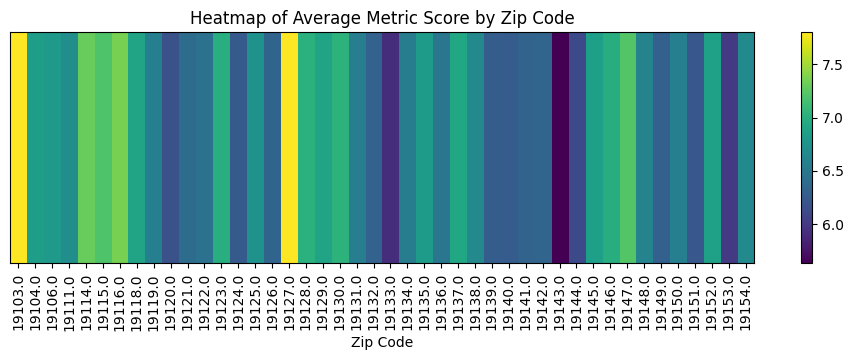

In [12]:
df_heatmap = sorted_average_by_zipcode.reset_index()

df_heatmap.columns = ['Zip Code', 'Average Metric Score']

df_heatmap['Dummy'] = 1

pivot_table = df_heatmap.pivot(index='Dummy', columns='Zip Code', values='Average Metric Score')

plt.figure(figsize=(12, 3))  
plt.imshow(pivot_table, cmap='viridis', aspect='auto')  
plt.colorbar()

plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns, rotation=90)
plt.yticks([])  

plt.title('Heatmap of Average Metric Score by Zip Code')
plt.xlabel('Zip Code')
plt.show()